In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import cv2

from scipy import ndimage





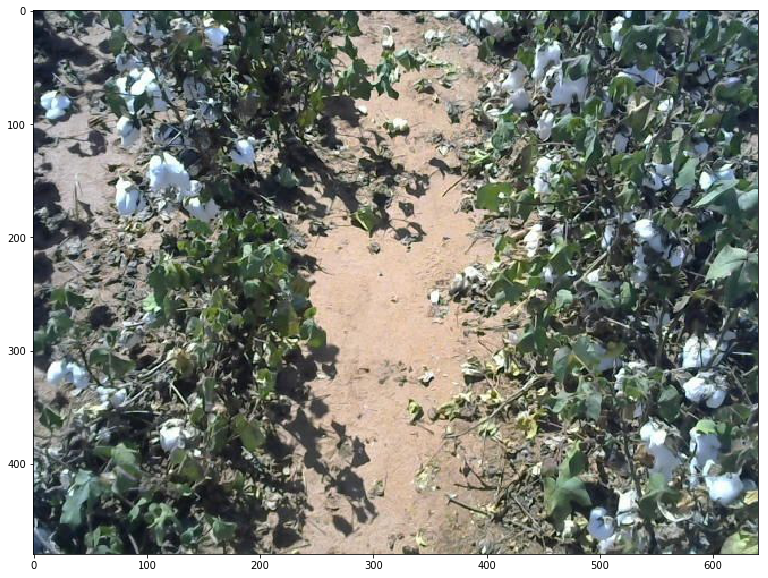

In [176]:
image = np.array(Image.open('nav_front/frame_10.jpg'))

plt.figure(figsize=(20,10))
plt.imshow(image)

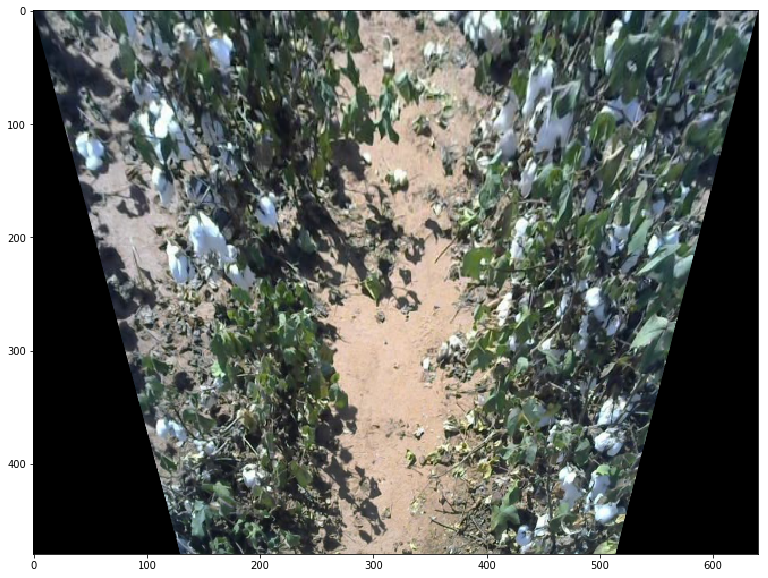

In [127]:
IMAGE_H = image.shape[0]
IMAGE_W = image.shape[1]

src = np.float32([[200, IMAGE_H], [450, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[250, IMAGE_H], [400, IMAGE_H], [0, 0], [IMAGE_W, 0]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

#img = img[450:(450+IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop
warped_img = cv2.warpPerspective(image, M, (IMAGE_W, IMAGE_H)) # Image warping

plt.figure(figsize=(20,10))
plt.imshow(warped_img) # Show results


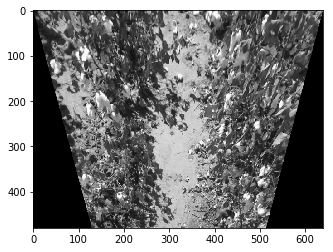

In [128]:
grayscale = cv2.cvtColor(warped_img, cv2.COLOR_RGB2GRAY)
#grayscale = ~grayscale
plt.imshow(grayscale, cmap='gray')

In [129]:
def normalize(v):
    return v / np.sqrt(np.sum(v**2))

(640,)


499312572.65902346

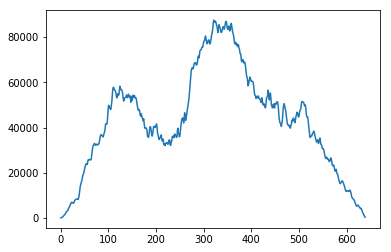

In [130]:
vector = np.sum(grayscale, axis=0)

print(vector.shape)

plt.plot(vector)

np.var(vector)

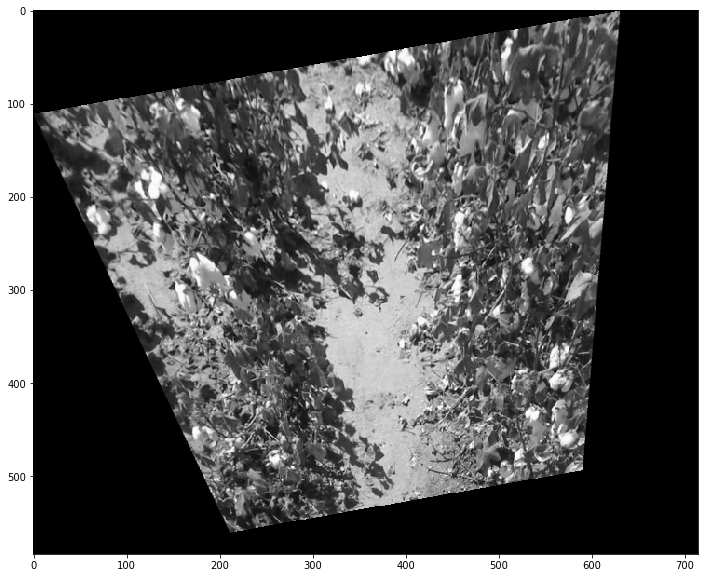

In [131]:
new_image = ndimage.rotate(grayscale, 10)
#new_image = new_image[100:new_image.shape[0]-100, 100:new_image.shape[1]-100]
plt.figure(figsize=(20,10))
plt.imshow(new_image,cmap='gray')

(614,)


16.589301155478708

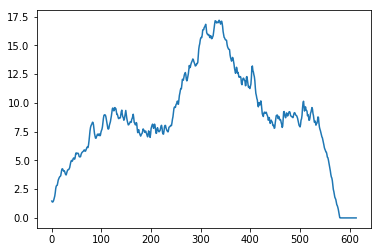

In [132]:
vector = np.sum(normalize(new_image), axis=0)

vector = vector[50:vector.shape[0]-50]

print(vector.shape)

plt.plot(vector)

np.var(vector)

(0.0, 195605626.11327147)


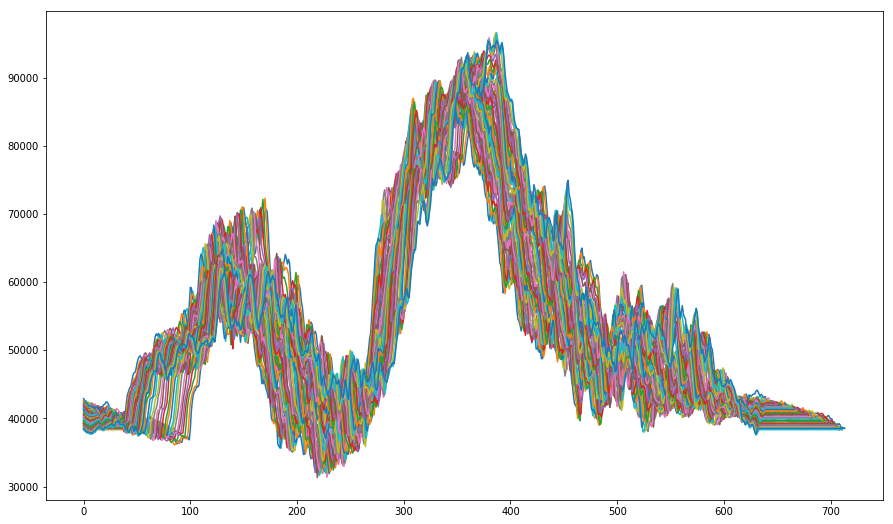

In [242]:

theta = [(i-30)/3. for i in range(61)]

best_variance = np.inf
best_angle = 0
plt.figure(figsize=(15,9))
for i in theta:
    new_image = ndimage.rotate(grayscale, i)

    new_image[new_image == 0] = np.mean(new_image)

    #new_image = new_image[100:500, 100:600]

    vector = np.sum(new_image, axis=0)
    #vector = vector[100:vector.shape[0]-100]

    new_variance = np.var(vector)

    if(new_variance < best_variance):
        best_variance = new_variance
        best_angle = i

    plt.plot(vector)


print(best_angle, best_variance)
    



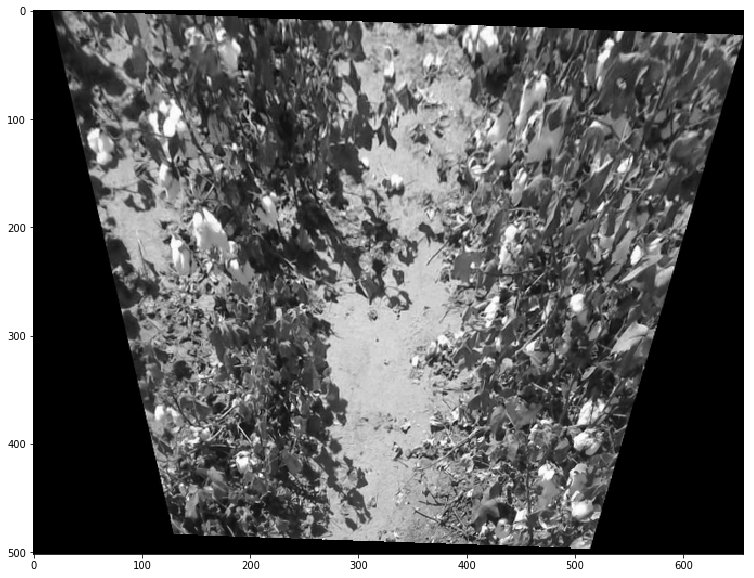

In [156]:
new_image = ndimage.rotate(grayscale, -2)

#new_image[new_image == 0] = np.mean(new_image)
#new_image = new_image[100:new_image.shape[0]-100, 100:new_image.shape[1]-100]
plt.figure(figsize=(20,10))
plt.imshow(new_image,cmap='gray')

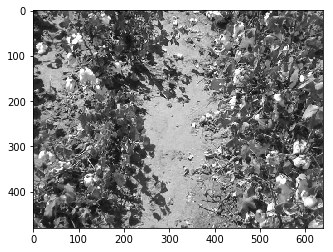

In [241]:

def exg(image):

    return  2*image[:,:,1] - image[:,:,0] - image[:,:,2]

def exr(image):
    return 1.3 * image[:,:,0] - image[:,:,1]   


def exgexr(image, th = 70):
    print(exg(image))
    print(exr(image))
    aux = exg(image) - exr(image)
    print(aux)
    aux[aux < th] = 0
    aux[aux >= th] = 1
    return aux

plt.imshow(image[:,:,1], cmap='gray')


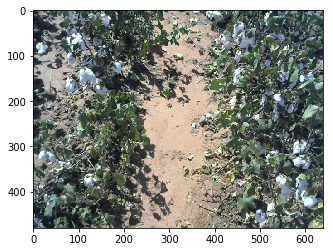

In [200]:
plt.imshow(image)